# Hellfire Random Enchantments

Showing data on the newest hellfire random enchantments. This build was tested by only using hellfire, talenting strictly into bonus spell damage, fire damage and spell crit talents while standing between the boss dummy and 3 mob dummies in Shattrath City. I was level 64 and not in spell caster gear besides for the staff.

![title](images/hellfire.png)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sklearn
from IPython.display import Image 
from IPython.display import HTML
from operator import itemgetter

dummy_int = 1
dummy_list = [2,22]
# backup copy, reads directly from the csv
hellfire_raw = pd.read_csv("hellfire_dps.csv")

#working copy
hellfire = hellfire_raw.copy()
hellfire.rename(columns={"Time (Minutes)": "Seconds"}, inplace = True)
hellfire.drop(["DPS Assumed", "Seconds"], axis=1, inplace=True)
hellfire.head()

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>The raw code for this Juypter notebook is hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a> (Not available in a PDF).''')

## Part 1: DPS 
I tested the each of the random enchants ten times each and recorded the damage. Each attempt is labeled as 'Trial' and damage per second as 'DPS'.

In [2]:
#splitting values
hellfire_basic = hellfire.loc[hellfire['Build'] == 'Basic']
hellfire_double = hellfire.loc[hellfire['Build'] == 'Double']
hellfire_demon = hellfire.loc[hellfire['Build'] == 'Demon']
hellfire_dup = hellfire.loc[hellfire['Build'] == 'Duplicate']

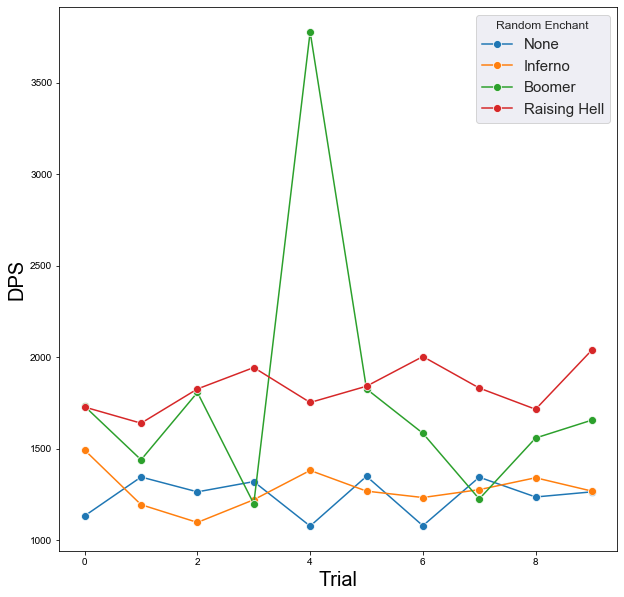

In [3]:
fig, ax = plt.subplots(figsize=(10, 10), sharex=True)
ten_intervals = range(0,10)
#ax_intervals =[ax[0,0], ax[0,1], ax[1,0], ax[1,1]]


plot = [hellfire_basic, hellfire_dup, hellfire_double, hellfire_demon]
titles = ["None", "Inferno","Boomer", "Raising Hell"]

#plot each line
for plot_num in range(len(plot)):
    local_plot = plot[plot_num]
    local_plot.reset_index()
    
    sns.lineplot(x=ten_intervals, y="DPS", data=local_plot, ax = ax)
    ax.lines[plot_num].set_marker("o")
    ax.lines[plot_num].set_markersize(8)



sns.set(style="darkgrid")
plt.ylabel('DPS', fontsize=20)
plt.xlabel('Trial', fontsize=20)
ax.legend(titles, title='Random Enchant', prop={'size': 15})
  
plt.show()

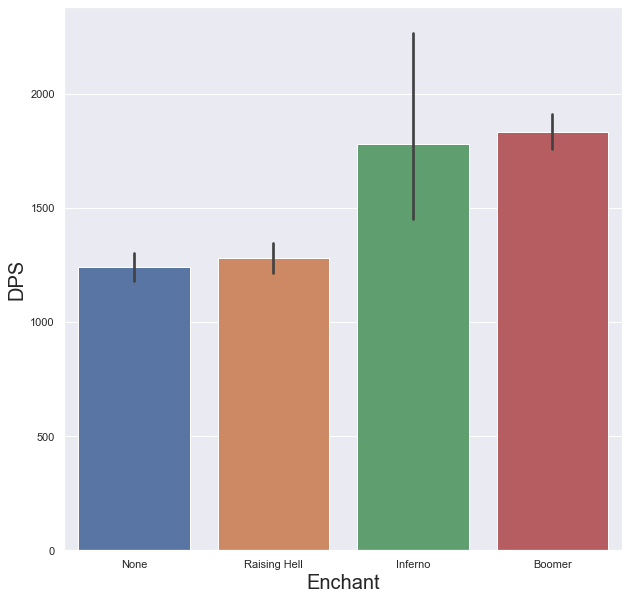

In [4]:
#np.asarray(dps_mean)

hellfire_raw = hellfire.sort_values(['DPS']).reset_index(drop=True)
original_names = ['Basic', 'Double', 'Demon', 'Duplicate']

for each in range(len(titles)):
    hellfire_raw.replace(original_names[each], titles[each], inplace=True)

plt.figure(figsize=(10,10))
sns.barplot(x="Build", y="DPS", data=hellfire_raw)
plt.ylabel('DPS', fontsize=20)
plt.xlabel('Enchant', fontsize=20)
plt.show()

In [5]:
dps_median = []
dps_mean = []
#dps_median[plot_num] = np.median(plot[plot_num]['DPS'])

for plot_num in range(len(plot)):
    dps_median.append(1)
    dps_median[plot_num] = np.median(plot[plot_num]['DPS'])
    
    dps_mean.append(1)
    dps_mean[plot_num] = [np.mean(plot[plot_num]['DPS']), titles[plot_num]]
    
    print(dps_mean[plot_num][1] + " has an average DPS of", dps_mean[plot_num][0], "and has a standard devation of", round(np.std(plot[plot_num]['DPS'])))
    


None has an average DPS of 1242.1 and has a standard devation of 103
Inferno has an average DPS of 1278.1 and has a standard devation of 103
Boomer has an average DPS of 1781.1 and has a standard devation of 697
Raising Hell has an average DPS of 1832.6 and has a standard devation of 124


## Part 2: Total Damage

I also recorded the total damage.

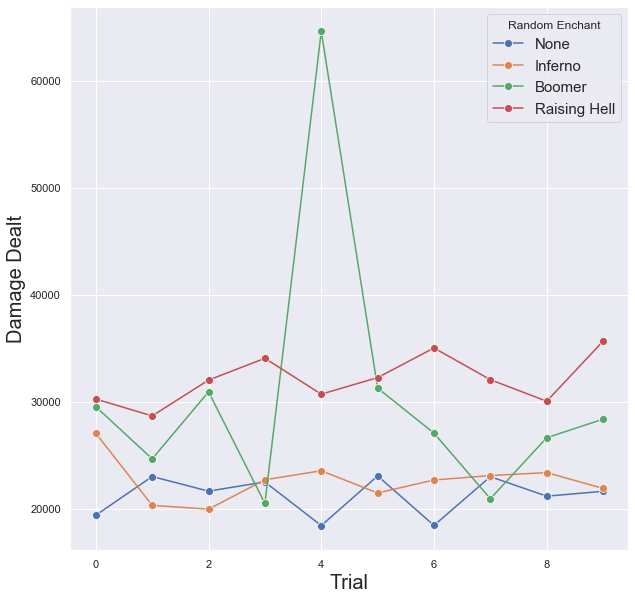

In [6]:
fig, ax_total = plt.subplots(figsize=(10, 10), sharex=True)

#plot each line
for plot_num in range(len(plot)):
    local_plot = plot[plot_num]
    local_plot.reset_index()
    
    sns.lineplot(x=ten_intervals, y="Damage Total", data=local_plot, ax = ax_total)
    ax_total.lines[plot_num].set_marker("o")
    ax_total.lines[plot_num].set_markersize(8)
    
sns.set(style="darkgrid")
plt.ylabel('Damage Dealt', fontsize=20)
plt.xlabel('Trial', fontsize=20)
ax_total.legend(titles, title='Random Enchant', prop={'size': 15})
  
plt.show()

It looks like it follows the DPS pretty closely. Makes sense.

## Part 3: Conclusion

These graphs don't show the whole picture since actually fighting is different. 

**Raising Hell** is the best at doing steady damage but will easily kill your minions if you're not careful.

**Boomer** is best for casting and forgetting. It can do godlike damage or not proc at all.

**Inferno** seems outclassed. It hardly increased damage when it proced. Maybe the reason for its low damage is that the duplication effect uses the targets spell power instead of the player's? Additionally, when it procs it reduces the channel time of hellfire, making the player have to cast hellfire sooner for little benefit. The increased speed would be intresting if the duplication effect dealt reasonable damage.

In [7]:
increase_percent = []

for each in range(len(dps_mean)):
    increase_percent.append(1)
    increase = dps_mean[each][0] - dps_mean[0][0]
    increase_percent[each] = (increase / dps_mean[0][0]) * 100
    
for each in range(1, len(dps_mean)):
    print(dps_mean[each][1] + " increases Hellfire damage by " + str(round(increase_percent[each])) + "%.")

Inferno increases Hellfire damage by 3%.
Boomer increases Hellfire damage by 43%.
Raising Hell increases Hellfire damage by 48%.
